In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria objeto com o caminho da pasta do Projeto
from pathlib import Path
#pasta_projeto = Path('/content/drive/MyDrive/AGU_Notebooks/Labs R2D2/')
pasta_projeto = Path(Path.cwd())

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

!pip install pyarrow
!pip install fastparquet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luciana.angrisano\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dados = pd.read_parquet(pasta_projeto /'dados_desbalanceados.parquet')

In [3]:
print(dados.shape)
dados['coordenacao'].value_counts()

(33111, 6)


coordenacao
COREJEF     13221
CORESP      11999
CORESE       3759
CORESA       1951
COREM        1111
COREPAM       613
CORAT         367
CORETRAB       55
COREPRO        35
Name: count, dtype: int64

In [4]:
dados

,cnj,orgao,classe,tipo,coordenacao,peticao_processada
index,,,,,,
0,10437601020204013300,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,COREJEF,vara juizados especiais federais secao judicia...
1,10028658120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
2,10028363120234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
3,10028622920234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
4,10030355320234013500,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",CORESE,juizo 1 vara secao judiciaria estado goias dis...
...,...,...,...,...,...,...
35645,10619787220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,inicial anexa
35647,10599157420234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,1 4 vara secao judiciaria distrito distribuica...
35648,10638251220234013400,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",CORESE,vara subsecao judiciaria distrito ref cumprime...


In [5]:
# define variaveis independentes e variável dependente(TARGET)
X = dados[['peticao_processada']]
y = dados['coordenacao']

In [6]:
dados.dtypes

cnj                   object
orgao                 object
classe                object
tipo                  object
coordenacao           object
peticao_processada    object
dtype: object

In [7]:
# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [8]:
# Tratamento dos dados de treino textual 
##posso tirar stopwords aqui
tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), min_df=3, max_df=0.70, max_features=1000)

# Aprende vocabulário e idf do conjunto de treinamento
tfidf.fit(X_train['peticao_processada'])

# Transforma documentos em matriz termo-documento
X_train_tfidf = tfidf.transform(X_train['peticao_processada'])
X_test_tfidf = tfidf.transform(X_test['peticao_processada'])

In [9]:
# tratamento do test
# após a transformação do texto usamos o todense para armazenar valores ausentes na série (quando nao encontrou a palavra na petição retornou "naN")
X_test_tfidf = pd.DataFrame(X_test_tfidf.todense())
X_test_tfidf.index = X_test.index

In [10]:
# tratamento dos dados do treino
X_train_tfidf = pd.DataFrame(X_train_tfidf.todense())
X_train_tfidf.index = X_train.index

In [11]:

X_test = X_test_tfidf
X_train = X_train_tfidf

In [12]:
from sklearn.preprocessing import LabelEncoder

# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Converte as classes de treinamento para números inteiros
y_train_encoded = label_encoder.fit_transform(y_train)

In [13]:
############################## a partir daqui um novo notebook.... preciso entender cmo salvar (X_train, y_train) e (X_test, y_test)

In [14]:
# importação das bibliotecas necessárias para treino e teste do modelo e métricas
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score


In [15]:

# importa o modelo Naive Bayes
model_naive_bayes = GaussianNB()

# treina o modelo Naive Bayes
model_naive_bayes.fit(X_train, y_train_encoded)

# codifica os rótulos do conjunto de teste (se ainda não estiverem codificados)
y_test_encoded = label_encoder.transform(y_test)

# realiza previsões no conjunto de teste
y_pred_test = model_naive_bayes.predict(X_test)

# Avalia o modelo Naive Bayes
accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(f"Acurácia do modelo Naive Bayes: {accuracy}")

Acurácia do modelo Naive Bayes: 0.8112637777442246


In [16]:
#importou a biblioteca para medir a acurácia balanceada
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test_encoded, model_naive_bayes.predict(X_test)))

0.7269790177406714


In [17]:
# importa a biblioteca para visualização das métricas
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, model_naive_bayes.predict(X_test)))



              precision    recall  f1-score   support

           0       0.40      0.71      0.51        73
           1       0.98      0.81      0.89      2645
           2       0.42      0.80      0.56       222
           3       0.55      0.83      0.66       123
           4       0.05      0.71      0.09         7
           5       0.94      0.83      0.88       390
           6       0.67      0.74      0.70       752
           7       0.94      0.84      0.88      2400
           8       0.01      0.27      0.02        11

    accuracy                           0.81      6623
   macro avg       0.55      0.73      0.58      6623
weighted avg       0.89      0.81      0.84      6623



In [18]:
# Converte os resultados preditos de volta para os nomes originais
y_pred_encoded = model_naive_bayes.predict(X_test)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Imprime o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

       CORAT       0.40      0.71      0.51        73
     COREJEF       0.98      0.81      0.89      2645
       COREM       0.42      0.80      0.56       222
     COREPAM       0.55      0.83      0.66       123
     COREPRO       0.05      0.71      0.09         7
      CORESA       0.94      0.83      0.88       390
      CORESE       0.67      0.74      0.70       752
      CORESP       0.94      0.84      0.88      2400
    CORETRAB       0.01      0.27      0.02        11

    accuracy                           0.81      6623
   macro avg       0.55      0.73      0.58      6623
weighted avg       0.89      0.81      0.84      6623



In [19]:
!pip install seaborn
!pip install matplotlib

<Figure size 1000x800 with 0 Axes>

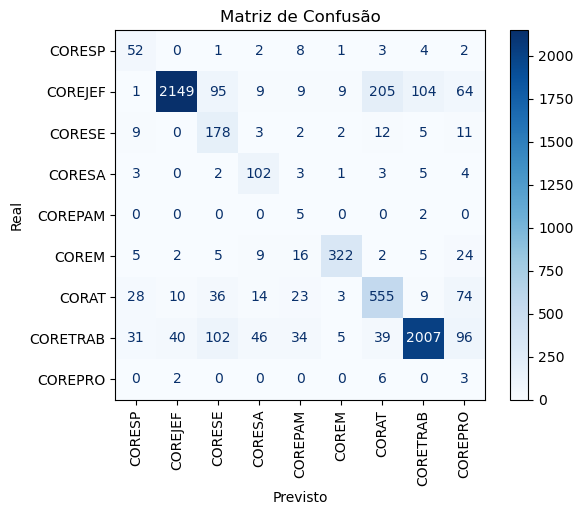

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test_encoded, model_naive_bayes.predict(X_test))

# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_naive_bayes, X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")

# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()


In [21]:
!pip install -U imbalanced-learn


In [22]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
index,,,,,,,,,,,,,,,,,,,,,
13054,0.00461,0.002946,0.000000,0.005890,0.000000,0.007715,0.005046,0.003191,0.0,0.004665,...,0.000000,0.000000,0.007832,0.000000,0.000000,0.006878,0.000000,0.000000,0.002827,0.002705
11935,0.00000,0.029210,0.000000,0.014598,0.017957,0.057360,0.012507,0.000000,0.0,0.000000,...,0.024890,0.045663,0.000000,0.014696,0.000000,0.017047,0.000000,0.000000,0.000000,0.000000
32040,0.00000,0.025057,0.011200,0.025044,0.000000,0.000000,0.000000,0.040700,0.0,0.000000,...,0.010675,0.000000,0.011100,0.012606,0.013290,0.000000,0.000000,0.036030,0.012021,0.011500
26681,0.00000,0.025181,0.011256,0.025168,0.000000,0.000000,0.000000,0.040902,0.0,0.000000,...,0.010729,0.000000,0.011155,0.012669,0.013356,0.000000,0.000000,0.036209,0.012081,0.011557
14616,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,0.00000,0.000000,0.000000,0.014219,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.012605,0.014315,0.000000,0.000000,0.014933,0.000000,0.000000,0.013059
2964,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064537,0.000000,0.0,0.000000,...,0.032110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14426,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014701,0.018590,0.0,0.000000,...,0.014629,0.004473,0.011408,0.008637,0.027317,0.030057,0.009010,0.008229,0.000000,0.003940


In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train.columns = X_train.columns.astype(str)


ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instancia o modelo Naive Bayes
model_naive_bayes_resampled = GaussianNB()

# Treina o modelo Naive Bayes
model_naive_bayes_resampled.fit(X_train_resampled, y_train_resampled)

y_test_encoded = label_encoder.transform(y_test)

# Realiza previsões no conjunto de treinamento
y_pred_train = model_naive_bayes_resampled.predict(X_test)

# Avalia o modelo Naive Bayes
accuracy = accuracy_score(y_test_encoded,y_pred_train)
print(f"Acurácia do modelo Naive Bayes: {accuracy}")


C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Acurácia do modelo Naive Bayes: 0.8121697116110524


In [26]:
print(balanced_accuracy_score(y_test_encoded, model_naive_bayes_resampled.predict(X_test)))

C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7300742062530725


In [27]:
print(classification_report(y_test_encoded, model_naive_bayes_resampled.predict(X_test)))


C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.41      0.74      0.53        73
           1       0.98      0.81      0.89      2645
           2       0.43      0.81      0.56       222
           3       0.54      0.81      0.65       123
           4       0.05      0.71      0.09         7
           5       0.94      0.83      0.88       390
           6       0.68      0.74      0.71       752
           7       0.94      0.84      0.88      2400
           8       0.01      0.27      0.02        11

    accuracy                           0.81      6623
   macro avg       0.55      0.73      0.58      6623
weighted avg       0.89      0.81      0.84      6623



C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

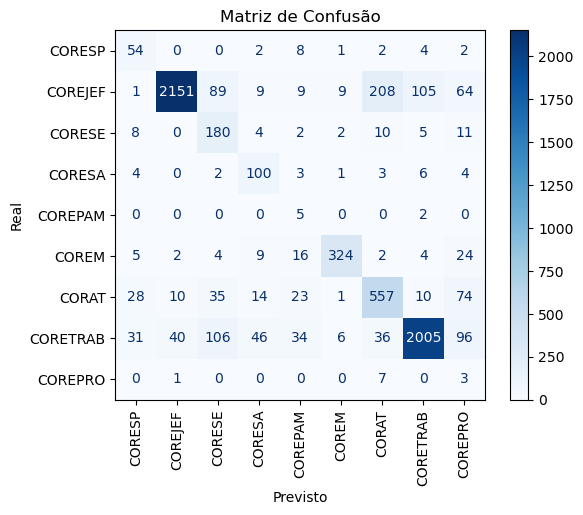

In [28]:
# Calcula a matriz de confusão

cm = confusion_matrix(y_test_encoded, model_naive_bayes_resampled.predict(X_test))


# Define o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Cria o objeto ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_estimator(model_naive_bayes_resampled,X_test, y_test_encoded, display_labels=y_test.unique(), cmap="Blues",  xticks_rotation="vertical")



# Adiciona rótulos aos eixos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")

# Mostra o gráfico
plt.show()